In [1]:
import pandas as pd
import numpy as np

from tqdm import tqdm
from sklearn import preprocessing
from scipy import stats
from itertools import combinations

from news_vec.utils import read_json_gz_lines

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

%matplotlib inline

In [3]:
df = pd.DataFrame(list(tqdm(read_json_gz_lines('../data/clf-ava-ts-rows.json/'))))

977704it [00:13, 70781.96it/s]


In [4]:
df.head(10)

,article_id,clf_tokens,domain,impressions,p_true,tokens,window
0,1408749279974,"[where, neil, gorsuch, would, fit, on, the, su...",nytimes.com,1285133,0.091902,"[Where, Neil, Gorsuch, Would, Fit, on, the, Su...",0
1,1494648637787,"[obama, names, #, new, national, civil, rights...",dailykos.com,238949,0.063276,"[Obama, names, 3, new, national, civil, rights...",0
2,1047972044291,"[unacceptable, racist, for, trump, to, call, e...",breitbart.com,40766,0.070624,"[Franken, :, ', Unacceptable, ,, ', ', Racist,...",0
3,584115573315,"[police, arrest, four, planning, terror, attac...",thehill.com,2116852,0.022222,"[Reports, :, Police, arrest, four, planning, t...",0
4,584115591806,"[trump, signs, #, executive, orders, on, crime]",rt.com,16943,0.057073,"[Trump, signs, 3, executive, orders, on, crime...",0
5,1571958069764,"[virginia, scheduled, to, execute, man, for, #...",buzzfeed.com,659550,0.061597,"[Virginia, Scheduled, To, Execute, Man, For, 2...",0
6,1073741851769,"[milo, protester, shoots, suspected, conservat...",dailycaller.com,131268,0.096024,"[Milo, Protester, Shoots, Suspected, Conservat...",0
7,1279900269675,"[senate, passes, mnuchin, as, treasury, secret...",dailycaller.com,21049,0.061873,"[Senate, Passes, Mnuchin, As, Treasury, Secret...",0
8,661424990794,"[something, s, fishy, at, manaus, airport, in,...",npr.org,33384,0.076492,"[Something, 's, Fishy, At, Manaus, Airport, In...",0
9,317827584905,"[#, times, brendon, urie, was, too, pure, for,...",buzzfeed.com,24108,0.451191,"[19, Times, Brendon, Urie, Was, Too, Pure, For...",0


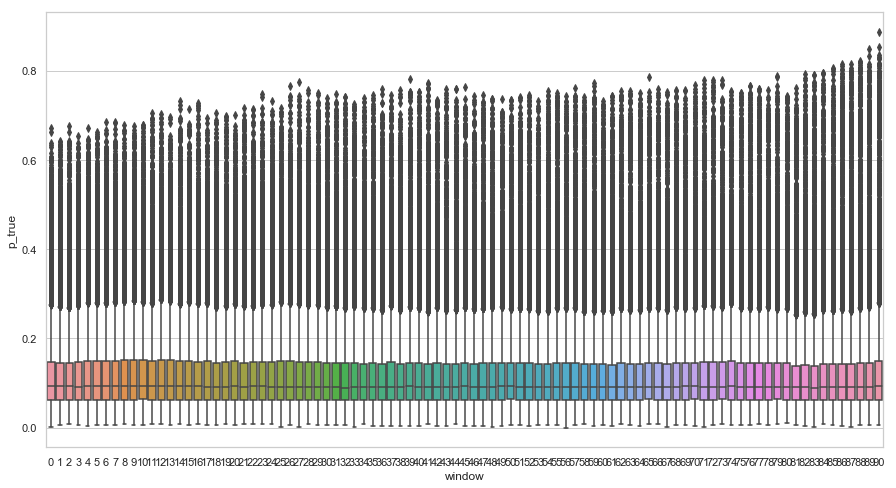

In [6]:
plt.figure(figsize=(15,8))
sns.boxplot(x='window', y='p_true', data=df)

nytimes.com


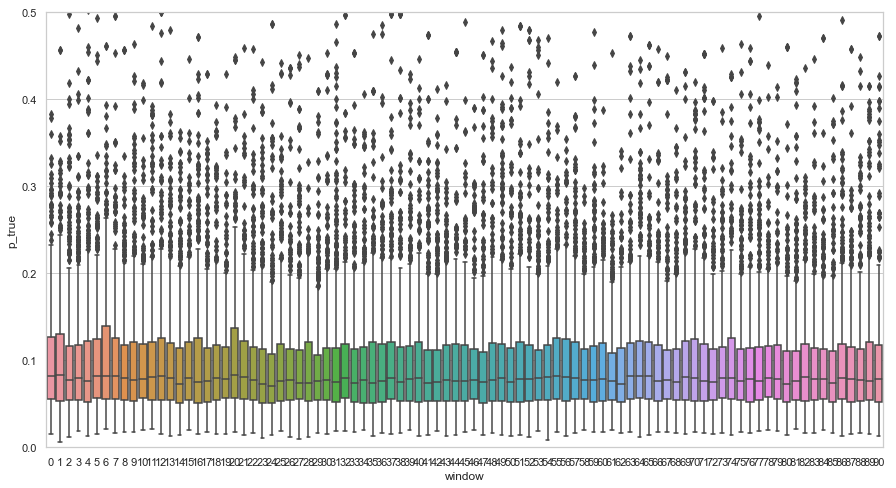

dailykos.com


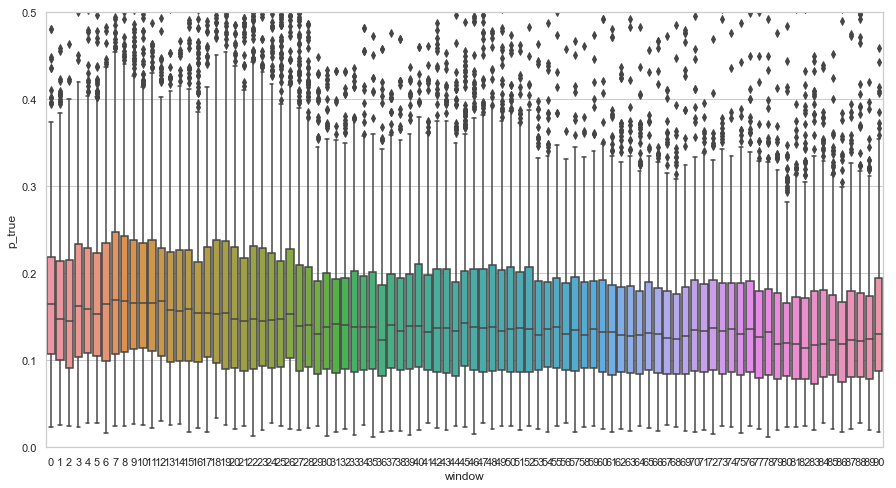

breitbart.com


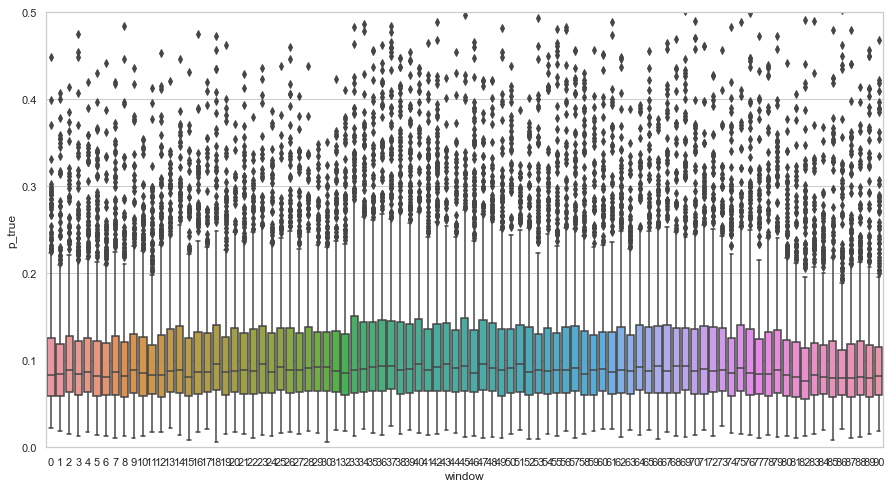

thehill.com


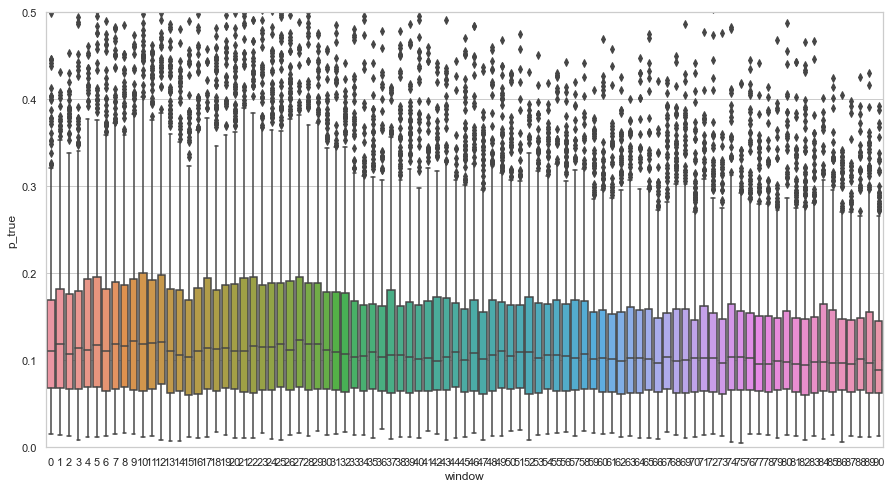

rt.com


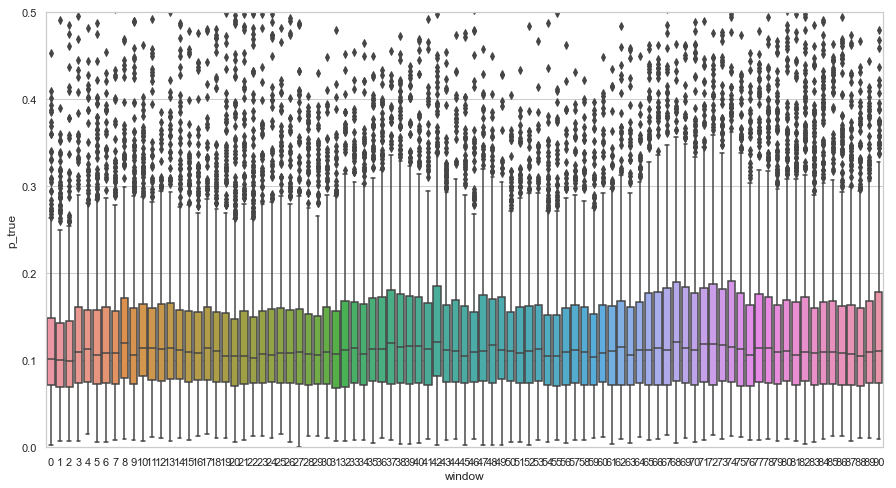

buzzfeed.com


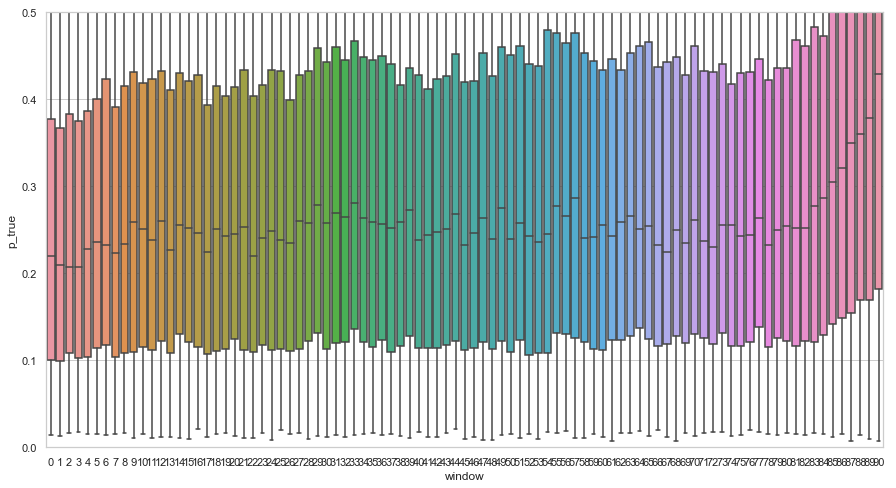

dailycaller.com


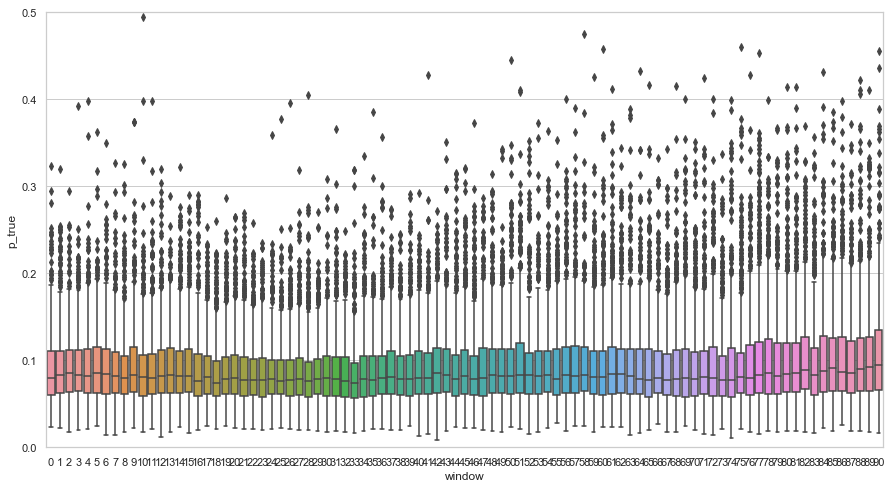

npr.org


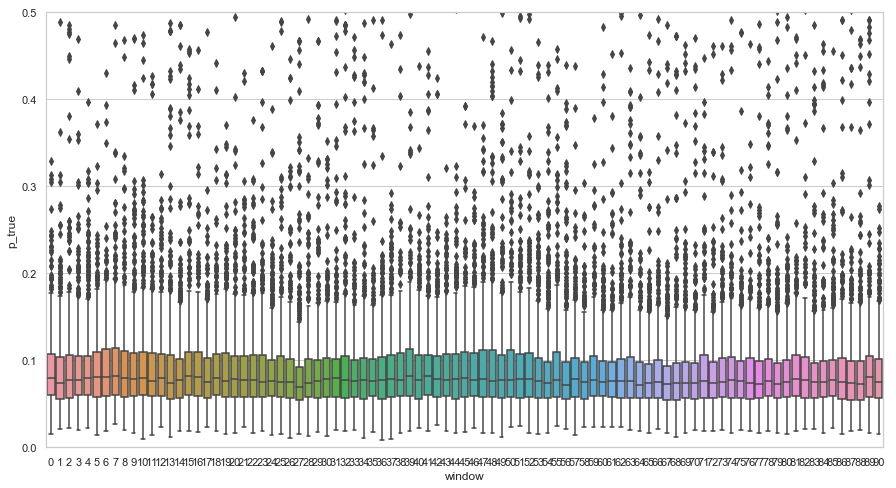

bloomberg.com


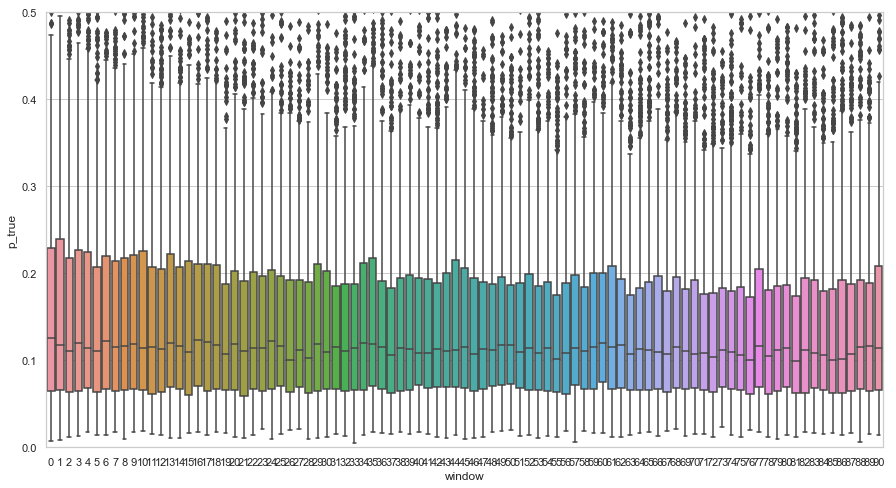

wsj.com


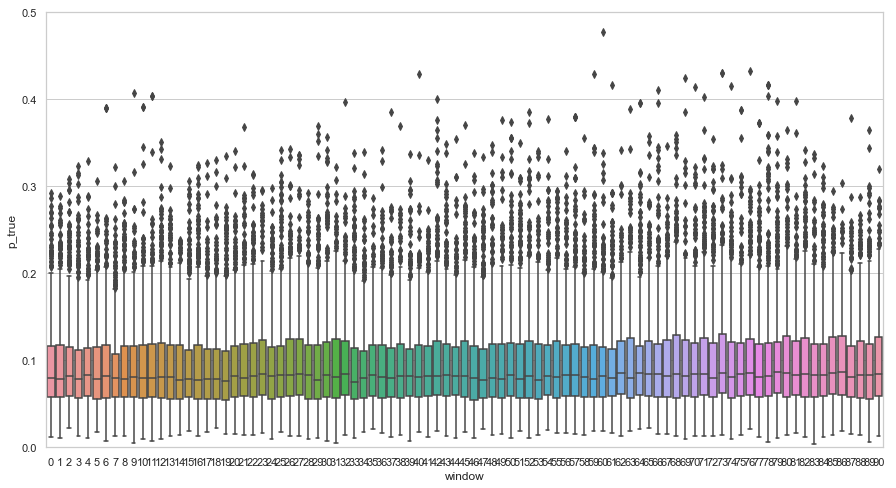

cnn.com


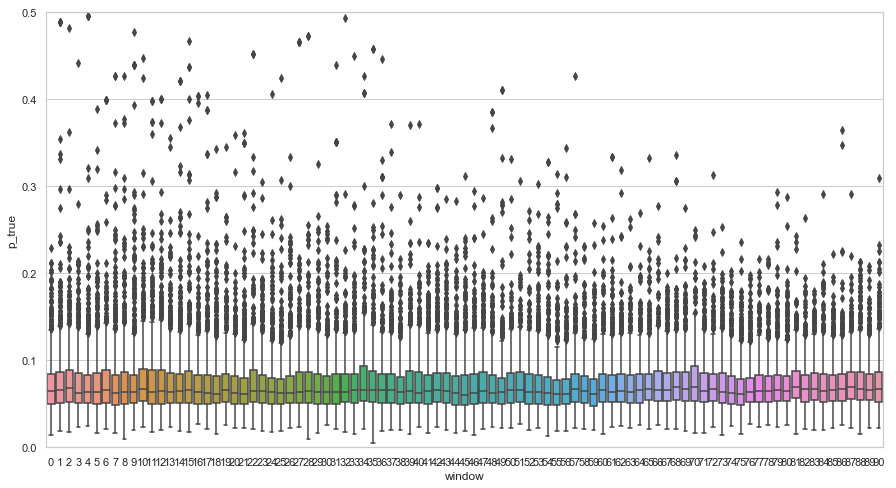

apnews.com


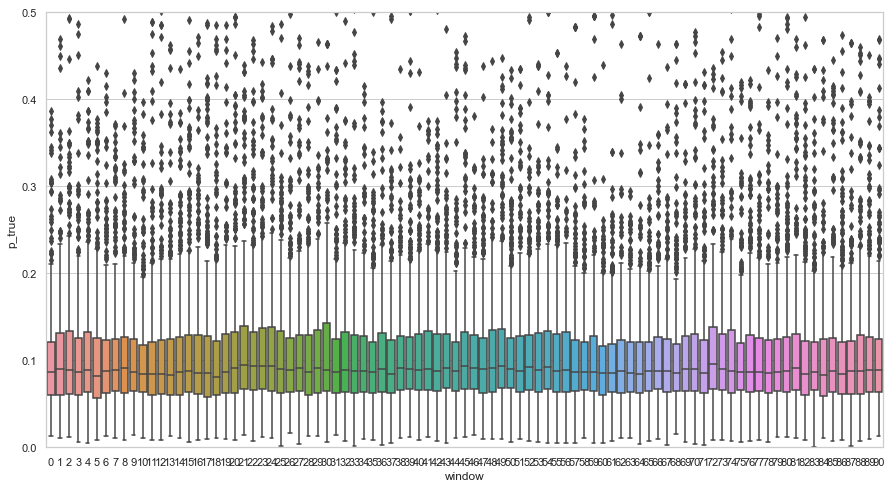

sputniknews.com


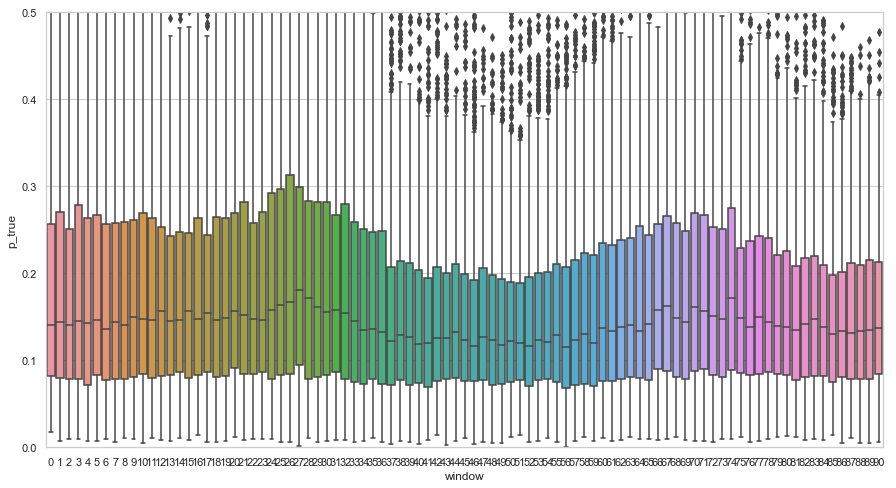

huffingtonpost.com


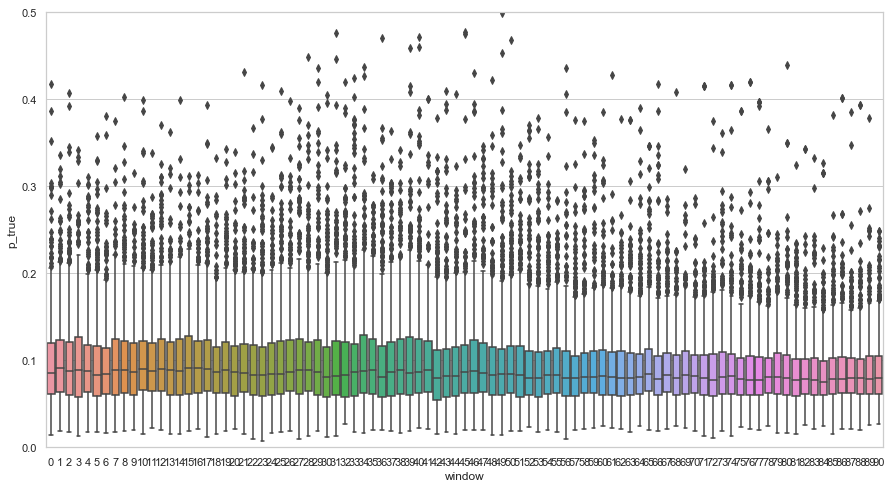

washingtonpost.com


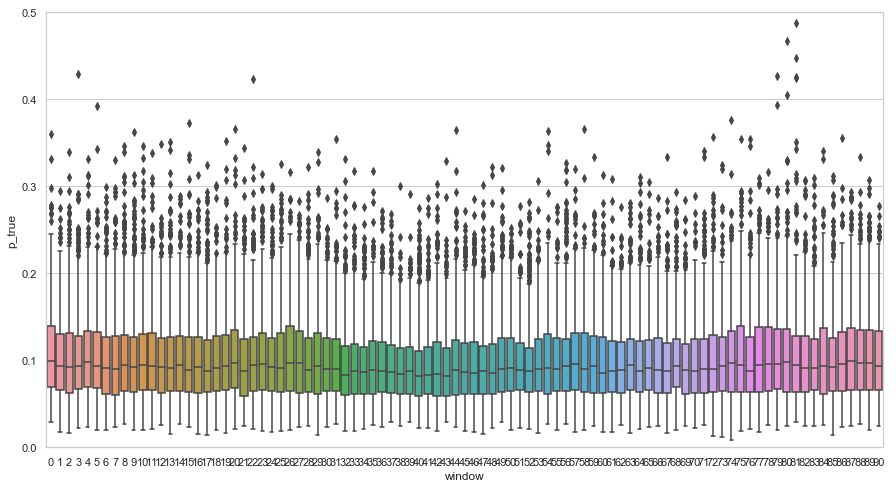

foxnews.com


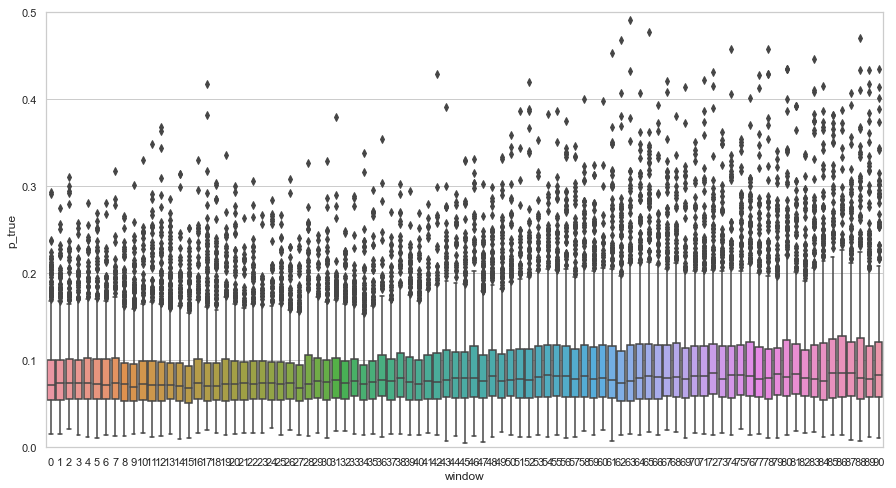

In [7]:
for d in df.domain.unique():
    print(d)
    plt.figure(figsize=(15,8))
    plt.ylim(0, 0.5)
    sns.boxplot(x='window', y='p_true', data=df[df.domain==d])
    plt.show()

In [37]:
df[df.domain=='foxnews.com'].sort_values('p_true', ascending=False).head(10)

,article_id,clf_tokens,domain,impressions,p_true,tokens,window
678690,1606317788256,"[arizona, mother, arrested, after, toddler, ba...",foxnews.com,144552,0.491556,"[Arizona, mother, arrested, after, toddler, ,,...",63
702499,60129545049,"[missing, california, uber, driver, is, found,...",foxnews.com,32347,0.477638,"[Missing, California, Uber, driver, is, found,...",65
953822,1546188230329,"[georgia, woman, placed, dead, newborn, in, fr...",foxnews.com,195065,0.470718,"[Georgia, woman, placed, dead, newborn, in, fr...",88
670229,1073741867288,"[kentucky, police, officer, discovered, dead, ...",foxnews.com,38827,0.468782,"[Kentucky, police, officer, discovered, dead, ...",62
843595,953482778806,"[california, man, caught, breakdancing, on, vi...",foxnews.com,16025,0.457712,"[California, man, caught, breakdancing, on, vi...",78
800379,1486058697020,"[alleged, tennessee, cop, killer, arrested, af...",foxnews.com,98330,0.457695,"[Alleged, Tennessee, cop, killer, arrested, af...",74
664620,257698064958,"[man, arrested, after, gunning, down, arizona,...",foxnews.com,22649,0.453223,"[Man, arrested, after, gunning, down, Arizona,...",61
901172,506806186386,"[police, officer, shot, in, fort, myers, fla, ...",foxnews.com,212104,0.446368,"[Police, officer, shot, in, Fort, Myers, ,, Fl...",83
866708,24909,"[special, report, with, bret, baier]",foxnews.com,21348,0.434805,"[Special, Report, With, Bret, Baier, -, Friday...",80
865325,1683627212473,"[special, report, with, bret, baier]",foxnews.com,27233,0.434805,"[Special, Report, With, Bret, Baier, -, Tuesda...",80
